# Ejemplo: Lectura y escritura de documentos
**Autor:** Unidad de Científicos de Datos (UCD)

---
Este ejemplo muestra las principales funcionalidades de los módulos `lectura` y `escritura`, de la librería **ConTexto**. Estos módulos permiten extraer textos de archivos en diferentes formatos, así como escribir texto en nuevos archivos.

Para mayor información sobre estos módulos y sus funciones, se puede consultar su documentación:

* <a href="https://ucd-dnp.github.io/ConTexto/funciones/lectura.html" target="_blank">Lectura</a>
* <a href="https://ucd-dnp.github.io/ConTexto/funciones/escritura.html" target="_blank">Escritura</a>

Adicionalmente, es necesario recordar que para el correcto funcionamiento del módulo de `lectura` es necesario tener instalados Poppler y Tesseract en el computador del usuario. Para más información sobre cómo instalar estos requerimientos, por favor consultar la <a href="https://ucd-dnp.github.io/ConTexto/instalacion/instalacion_popple_teseract.html#instalacion-poppler-tesseract" target="_blank">Documentación de instalación</a>.

---

## 1. Importar paquetes necesarios y definir documentos para la prueba

La carpeta "entrada" tiene insumos que servirán para correr estos ejemplos de la librería **ConTexto**. En este caso en particular, se van a utilizar documentos de esta carpeta, que están en los siguientes formatos:

* Archivo plano (.txt)
* Archivos .PDF; uno digitalizado y uno escaneado (se requiere aplicar OCR para leer este)
* Archivos de Microsoft Word (.doc y .docx)
* Archivo tipo *Rich Text Format* (.rtf)
* Imagen con texto (.png)

El módulo de lectura de **ConTexto** puede extraer texto de todos estos tipos de archivos.


In [1]:
# Importar módulos y paquetes necesarios
import re

from contexto.lectura import Lector, leer_texto
from contexto.escritura import Escritor, escribir_texto

# Rutas de los archivos de los cuales se va a extraer texto
archivo_txt = 'entrada/prueba_in.txt'
archivo_pdf = 'entrada/prueba_in.pdf'
archivo_pdf_ocr = 'entrada/prueba_in_ocr.pdf'
archivo_docx = 'entrada/prueba_in.docx'
archivo_doc = 'entrada/prueba_in.doc'
archivo_rtf = 'entrada/prueba_in.rtf'
archivo_img = 'entrada/prueba_in.png'


---

## 2. Extraer texto de los documentos, y escribir el texto extraído en nuevos archivos

A continuación se definen dos listas, una de los documentos a leer y otra de los documentos en los que se quiere guardar el texto extraído. Los nuevos documentos quedarán guardados en la carpeta "salida", una vez se corra el ejemplo.

In [2]:
# Definir lista de archivos de entrada
archivos_in = [archivo_docx, archivo_pdf, archivo_pdf_ocr,
               archivo_txt, archivo_rtf, archivo_img]

# Definir lista de archivos de salida, simplemente cambiando el nombre de la carpeta ("salida" en vez de "entrada")
archivos_out = [re.sub('entrada', 'salida', i) for i in archivos_in]

A continuación se hace un recorrido por la lista de documentos de entrada, y para cada uno:

* Se determina si se necesita utilizar OCR (solo es necesario definirlo para el archivo de PDF escaneado. En las imagenes se utiliza OCR por defecto).
* Se utiliza la función `leer_texto` para extraer el texto del documento.
* El texto extraído se guarda en el archivo de salida, utilizando la función `escribir_texto`. Esta función permite guardar texto en archivos planos (.txt), PDF y Word (.docx). Si el nombre del archivo especificado es de otro tipo, la función guarda el texto como un archivo plano.


In [3]:
for i, archivo in enumerate(archivos_in):
    aplicar_ocr = True if 'ocr' in archivo else False
    print('------------')
    print(archivo)
    texto = leer_texto(archivo, por_paginas=True, ocr=aplicar_ocr, preprocesamiento=3)
    escribir_texto(archivos_out[i], texto)


------------
entrada/prueba_in.docx
------------
entrada/prueba_in.pdf
------------
entrada/prueba_in_ocr.pdf
------------
entrada/prueba_in.txt
------------
entrada/prueba_in.rtf
Formato desconocido. Se escribirá en un formato plano (.txt).
------------
entrada/prueba_in.png
Formato desconocido. Se escribirá en un formato plano (.txt).


---

## 3. Utilizar el OCR para extraer textos de imágenes

El OCR (reconocimiento óptico de caracteres) se utiliza para extraer texto de archivos de imagen. **ConTexto** incorpora el OCR de Tesseract para extraer texto de imágenes (como, por ejemplo, documentos escaneados). Actualmente, la librería soporta archivos en formatos ".png", ".jpg" y ".jpeg". Para archivos PDF, la librería primero convierte las páginas a imágenes, y luego aplica el OCR.

Adicionalmente, la librería permite realizar algunas operaciones de preprocesamiento sobre las imágenes antes de aplicar el OCR. Estos preprocesamientos pueden permitir hacer una lectura más acertada de los textos de las imágenes. 

En este ejemplo, se va a leer el contenido de una imagen, y se va a mostrar cómo diferentes pre-procesamientos del OCR pueden llevar a diferentes resultados en la lectura. En primer lugar, se carga y grafica la imagen. No es necesario hacer esto para extraer el texto; solo se grafica acá por motivos didácticos.


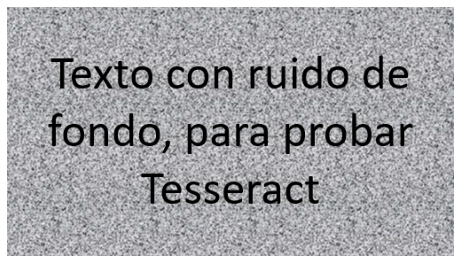

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(archivo_img)

plt.figure(figsize=(8,10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

El parámetro *preprocesamiento* de la función `leer_texto` y de la clase `Lector` permite elegir entre 5 diferentes tratamientos previos a la imagen. Si el valor de *preprocesamiento* no está en el rango de 1 a 5, no se realizará ningún preprocesamiento sobre la imagen.

A continuación, se lee la imagen sin preprocesar y con dos tipos distintos de procesamiento, imprimiendo el resultado en cada caso.

In [5]:
procesamientos = [0, 2, 4]
for p in procesamientos:
    print('---------------')
    if p == 0:
        print(f'Preprocesamiento: {p} (sin Preprocesamiento)')
    else:
        print(f'Preprocesamiento: {p}')
    texto = leer_texto(archivo_img, preprocesamiento=p)
    print(texto)


---------------
Preprocesamiento: 0 (sin Preprocesamiento)
fTextó contruidó de Í"
fondo, paré probar
Tesseract


---------------
Preprocesamiento: 2
Texto con ruido de
fondo, para probar
Tesseract


---------------
Preprocesamiento: 4
 




Se puede observar que el mejor desempeño se obtiene con *preprocesamiento=2*. Cuando no se hace ningún procesamiento, el ruido de fondo de la imagen afecta el texto extraído. Por otro lado, con *preprocesamiento=4* la función no encuentra ningún texto. Dependiendo de la calidad de la imagen (o archivo PDF escaneado) de entrada, diferentes preprocesamientos (o no aplicar ninguno) tendrán mejor o peor desempeño.

## 3.1 Enderezar textos en imágenes
Además del parámetro *preprocesamiento*, la función `leer_texto` y la clase `Lector` cuenta con el parámetro *enderezar*, por defecto igual a `False`. Cuando este parámetro se hace igual a `True`, la librería intentará identificar y corregir un giro en el texto de la imagen de la cual se desea extraer texto. Una vez se haga esta corrección de giro, se aplicará el OCR.

Este procesamiento adicional se puede combinar con cualquiera de los 5 preprocesamientos de la librería, o incluso se puede aplicar sin necesidad de utilizar el parámetro *preprocesamiento*. La corrección de giro puede ser bastante útil para textos torcidos, como en el caso de documentos escaneados.


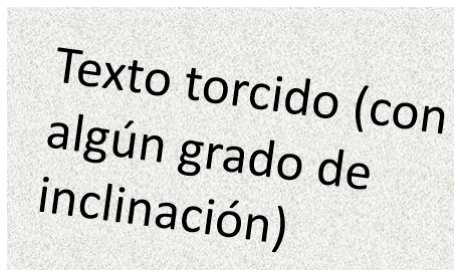

In [6]:
texto_torcido = 'entrada/texto_torcido.jpg'
img = mpimg.imread(texto_torcido)

plt.figure(figsize=(8,10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
enderezar = [False, True]
for e in enderezar:
    print('---------------')
    print(f'*Utilizando el parámetro enderezar={e}:*')
    texto = leer_texto(texto_torcido, preprocesamiento=4, enderezar=e)
    print(texto)

---------------
*Utilizando el parámetro enderezar=False:*
Texto tºfCido (Cºn

algún grado de
inclinación)


---------------
*Utilizando el parámetro enderezar=True:*
Texto torcido (con
algún grado de
inclinación)




---

## 4. Utilizar las clases `Lector` y `Escritor`

Si se desea, también es posible utilizar las clases `Lector` y `Escritor` para leer y escribir archivos, respectivamente. 

In [8]:
# Definir objeto de clase Lector y extraer el texto
lector = Lector(archivo_img)
texto = lector.archivo_a_texto(preprocesamiento=2)

print(f'*El texto extraído es:* \n{texto}')

# Definir objeto de clase Escritor y escribir el texto en un nuevo archivo
escritor = Escritor('salida/prueba.txt', texto)
escritor.escribir_txt()

*El texto extraído es:* 
Texto con ruido de
fondo, para probar
Tesseract


